# Objectives
YWBAT
* apply the CLT to measure the mean distribution of a sample of data
* define confidence intervals for the mean distribution of a sample of data
* conduct bootstrap sampling on an array of data
* plot the sampling distribution of means using seaborn


# Outline
* load in the `ks-projects-201801.csv.gz` file using pandas in the `data/` folder
* take a bootstrap sample of the Comics category? (goal values)
    * does it resemble a normal distribution? Why/why not? 
    * should we clean any of the data? 
* plot the bootstrap sample of the Comics vs the original distribution of the Comics Category (goal values)
* using the CLT what is the distribution of sample means for the Comics category? Use 30 bootstrap sampling distributions. 
* what is the standard deviation of the sampling distribution of means? 
    * look up the formula for this, use the video I sent in the slack channel
* now look at the pledged amounts? 
* repeat this same exercise with Comics category, but only for pledged amount that are within 70% of their goal. If there aren't enough items to do sampling, find another category where the pledged amounts are high

In [16]:
import pandas as pd
import numpy as np

import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
def plot_dist(arr, xlabel="X", name="data", bins=20):
    sns.distplot(arr, bins=bins)
    plt.ylabel("PDF")
    plt.xlabel(xlabel)
    plt.title(f"PDF of {name}")
    plt.show() 
    
    
def sample_bootstrap(X):
    return np.random.choice(X, size=X.shape[0], replace=True)


def calculate_mean_statistics(arr, num_samples=30, plot_sampling_dist=False, ci=0.95):
    sample_mus = []
    sample_size = arr.shape[0]
    for i in range(num_samples):
        bootstrap = sample_bootstrap(arr)
        sample_mus.append(bootstrap.mean())
    sample_mu = np.mean(sample_mus)
    sample_std = arr.std()/np.sqrt(sample_size)
    if plot_sampling_dist:
        plot_dist(sample_mus, name="sample means")
    lower_limit, upper_limit = get_limits(sample_mu, sample_std, ci=ci)
    return sample_mu, sample_std, lower_limit, upper_limit


def get_limits(sample_mu, sample_std, ci=0.95):
    norm_dist = scs.norm(sample_mu, sample_std)
    outer_area = 1-ci
    half_outer_area = outer_area/2
    lower_limit = norm_dist.ppf(half_outer_area)
    upper_limit = norm_dist.ppf(1-half_outer_area)
    return lower_limit, upper_limit

In [18]:
df = pd.read_csv("../data/ks-projects-201801.csv.gz")
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [19]:
df.shape

(378661, 15)

In [20]:
df_comics = df.loc[df['category']=='Comics']
df_comics.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
24,1000091520,The Book Zoo - A Mini-Comic,Comics,Comics,USD,2014-11-12,175.0,2014-10-23 17:15:50,701.66,successful,66,US,701.66,701.66,175.00
28,1000104953,Rebel Army Origins: The Heroic Story Of Major ...,Comics,Comics,GBP,2016-01-28,100.0,2015-12-29 16:59:29,112.38,successful,27,GB,167.70,160.60,142.91
91,1000348776,P/O/V Comic and Literary Anthology,Comics,Comics,USD,2012-03-06,4289.0,2012-01-21 18:25:26,474.00,failed,14,US,474.00,474.00,4289.00
208,1000869383,The Case of the Silent Girl - a dark Sherlock ...,Comics,Comics,SEK,2016-07-18,4450.0,2016-06-18 20:16:00,8503.00,successful,47,SE,409.54,986.03,516.03
228,1000997384,"Quick, The Clockwork Knight Volume #2",Comics,Comics,USD,2014-06-03,2000.0,2014-04-16 05:25:22,2585.00,successful,105,US,2585.00,2585.00,2000.00


In [15]:
# checking for category/main_cateory mismatches
sum(df_comics['category']!=df_comics['main_category'])

0

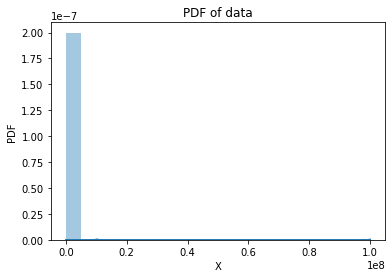

In [22]:
plot_dist(df_comics['goal'])

In [33]:
df_comics[['goal']].describe()

,goal
count,4.996000e+03
mean,3.304677e+04
std,1.428954e+06
min,1.000000e+00
25%,1.500000e+03
50%,3.845000e+03
75%,8.000000e+03
max,1.000000e+08


In [36]:
df_c_lh = df_comics.loc[df_comics['goal']<=df['goal'].median()]

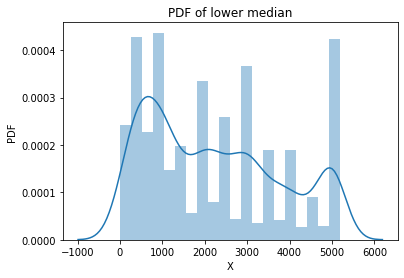

In [37]:
plot_dist(df_c_lh['goal'], name='lower median')

# Let's calculate the sample mean of the lower half of the data

In [38]:
lh_goal_mu_raw = df_c_lh['goal'].mean()
lh_goal_mu_raw

2219.2712323491655

In [40]:
sampling_distribution_mus = []

for i in range(30):
    bootstrap_sample = sample_bootstrap(df_c_lh['goal'])
    bs_sample_mean = bootstrap_sample.mean()
    sampling_distribution_mus.append(bs_sample_mean)

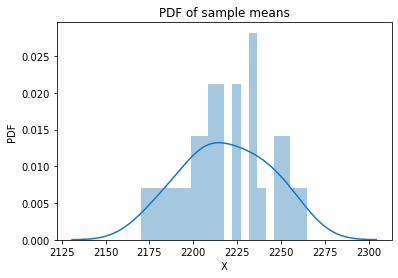

In [42]:
plot_dist(sampling_distribution_mus, name="sample means")

In [43]:
sampling_distribution_std = lh_goal_mu_raw/np.sqrt(df_c_lh.shape[0])
sampling_distribution_std

39.756821791055344

In [44]:
np.mean(sampling_distribution_mus)

2218.694306803595

In [45]:
# our distribution of means of the these lowerhalf values has the parameters mu=2218.69, std=39.756
sample_lh_mu=2218.69
sample_lh_std=39.756

In [46]:
# what are our (95%) confidence intervals for our mean of the lower half of the goal data for comics?

lh_comics_dist = scs.norm(loc=sample_lh_mu, scale=sample_lh_std)

In [54]:
# lower_bound of 0.05
lh_comics_dist.ppf(0.025), lh_comics_dist.ppf(0.975)

(2140.7696718306256, 2296.6103281693745)

In [55]:
# if we take a random sample of kickstarter comic campaigns under the median, 
# we'll see a mean between 2140 and 2296 with 95% confidence

In [58]:
sample_lh_mu-2*sample_lh_std, sample_lh_mu+2*sample_lh_std

(2139.178, 2298.202)

In [59]:
# let's find the columns where pledge/goal >= 0.70

In [60]:
df_comics['pledge_percent'] = df_comics['pledged'] / df_comics['goal']
df_comics.head()

/Users/rcarrasco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pledge_percent
24,1000091520,The Book Zoo - A Mini-Comic,Comics,Comics,USD,2014-11-12,175.0,2014-10-23 17:15:50,701.66,successful,66,US,701.66,701.66,175.00,4.009486
28,1000104953,Rebel Army Origins: The Heroic Story Of Major ...,Comics,Comics,GBP,2016-01-28,100.0,2015-12-29 16:59:29,112.38,successful,27,GB,167.70,160.60,142.91,1.123800
91,1000348776,P/O/V Comic and Literary Anthology,Comics,Comics,USD,2012-03-06,4289.0,2012-01-21 18:25:26,474.00,failed,14,US,474.00,474.00,4289.00,0.110515
208,1000869383,The Case of the Silent Girl - a dark Sherlock ...,Comics,Comics,SEK,2016-07-18,4450.0,2016-06-18 20:16:00,8503.00,successful,47,SE,409.54,986.03,516.03,1.910787
228,1000997384,"Quick, The Clockwork Knight Volume #2",Comics,Comics,USD,2014-06-03,2000.0,2014-04-16 05:25:22,2585.00,successful,105,US,2585.00,2585.00,2000.00,1.292500


In [61]:
df_comics['pp_g_70'] = df_comics['pledge_percent']>0.70
df_comics.head()

/Users/rcarrasco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pledge_percent,pp_g_70
24,1000091520,The Book Zoo - A Mini-Comic,Comics,Comics,USD,2014-11-12,175.0,2014-10-23 17:15:50,701.66,successful,66,US,701.66,701.66,175.00,4.009486,True
28,1000104953,Rebel Army Origins: The Heroic Story Of Major ...,Comics,Comics,GBP,2016-01-28,100.0,2015-12-29 16:59:29,112.38,successful,27,GB,167.70,160.60,142.91,1.123800,True
91,1000348776,P/O/V Comic and Literary Anthology,Comics,Comics,USD,2012-03-06,4289.0,2012-01-21 18:25:26,474.00,failed,14,US,474.00,474.00,4289.00,0.110515,False
208,1000869383,The Case of the Silent Girl - a dark Sherlock ...,Comics,Comics,SEK,2016-07-18,4450.0,2016-06-18 20:16:00,8503.00,successful,47,SE,409.54,986.03,516.03,1.910787,True
228,1000997384,"Quick, The Clockwork Knight Volume #2",Comics,Comics,USD,2014-06-03,2000.0,2014-04-16 05:25:22,2585.00,successful,105,US,2585.00,2585.00,2000.00,1.292500,True


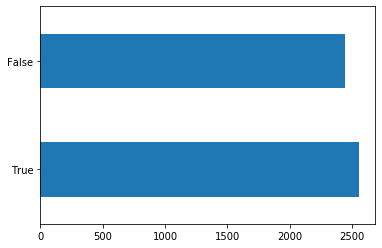

In [63]:
df_comics['pp_g_70'].value_counts().plot(kind='barh')
plt.show()

In [64]:
df_c_g70 = df_comics.loc[df_comics['pp_g_70']==True]

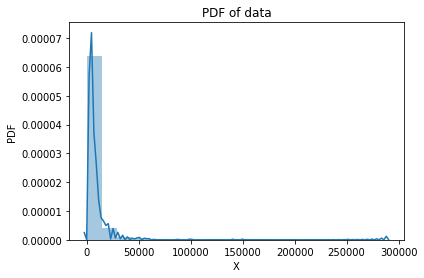

In [65]:
plot_dist(df_c_g70['goal'])

In [71]:
# remove all data under the 75 percentile
df_c_g70_75_under = df_c_g70.loc[df_c_g70['goal']<6000]

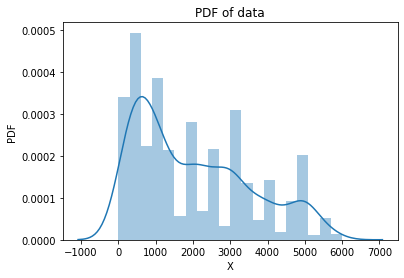

In [72]:
plot_dist(df_c_g70_75_under['goal'])

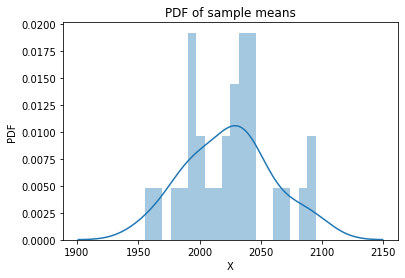

(2024.0630500088982,
 35.571552778026955,
 1954.3440876897996,
 2093.7820123279967)

In [75]:
calculate_mean_statistics(df_c_g70_75_under['goal'], plot_sampling_dist=True)

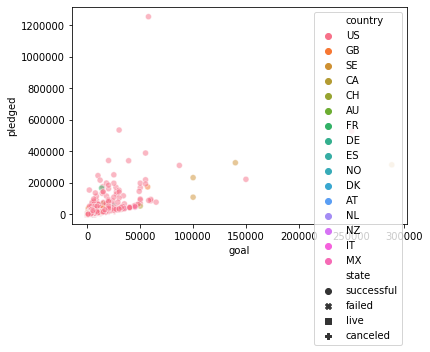

In [85]:
sns.scatterplot(x='goal', y='pledged', data=df_c_g70, style='state', hue='country', alpha=0.5)
plt.show()

# What did we learn? 
* feature engineering
    * roi, that's an engineered feature
* how to find confidence intervals using the ppf function
* bootstrap sampling
* the wonders of clt 
* bootstrap samples can reuse values
* herman hendig write dope comics
* order of functions doesn't matter
    * execute functions after they're defined
* sampling distributions sd function
* divide std by sqrt root of sample size to get the sampling std

# what is a zscore
* how many standard deviation away from the mean a data point is

# What is a z-critical score
* the z-score to meet a confidence interval 